|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Q2: Read instagram_users.csv file

In [2]:
df = pd.read_csv('instagram_users.csv')

# Q3: Split tha dataset into training and testing

In [3]:
X = df.drop(columns = 'real_fake',axis = 1)
y = df['real_fake']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [5]:
print('Decision Trees using paremater gini')

Decision Trees using paremater gini


In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [7]:
predictions = clf.predict(X_test)
predictions

array(['real', 'real', 'fake', ..., 'fake', 'real', 'fake'], dtype=object)

In [8]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print('accuracy_score',accuracy_score(y_test,predictions))
print('confusion_matrix',confusion_matrix(y_test,predictions))

accuracy_score 0.849071287745149
confusion_matrix [[8193 1409]
 [1500 8172]]


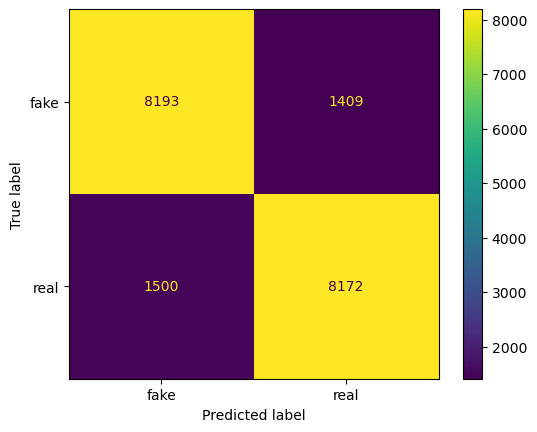

In [9]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

## Q4.2: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [10]:
print('Decision Trees using paremater entropy')

Decision Trees using paremater entropy


In [11]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier( criterion='entropy')
clf2 = clf2.fit(X_train,y_train)
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print('accuracy_score',accuracy_score(y_test,predictions))
print('confusion_matrix',confusion_matrix(y_test,predictions))

accuracy_score 0.849071287745149
confusion_matrix [[8193 1409]
 [1500 8172]]


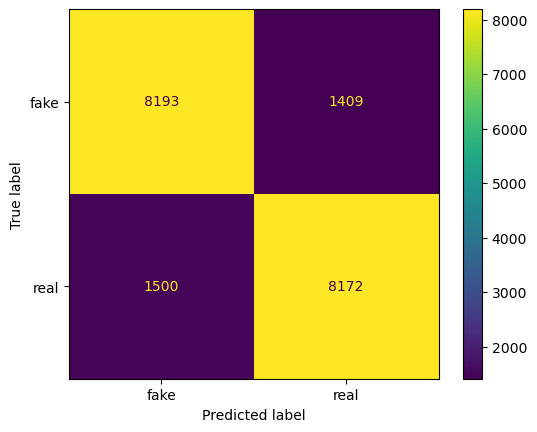

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [17]:
print(' RandomForestClassifier')

 RandomForestClassifier


In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100) #n_estimators: The number of trees in the forest.
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
rfc_pred = rfc.predict(X_test)

In [15]:
print('accuracy_score',accuracy_score(y_test,rfc_pred))
print('confusion_matrix',confusion_matrix(y_test,rfc_pred))

accuracy_score 0.8971152848396804
confusion_matrix [[8042 1560]
 [ 423 9249]]


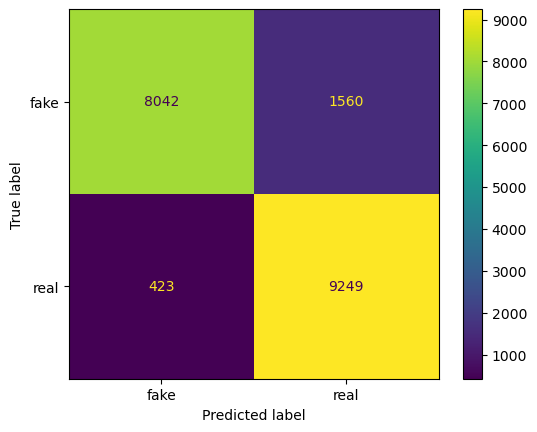

In [16]:
plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()